In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

In [77]:
path = '../../RBNdata/N10K3S1000G10001p0.5eps0.1alp-2/'#/BFS/S100001B100001I100001'
name = 'S*'

file_names = np.sort(glob.glob(path + '/BFS/' + name))
print(len(file_names))
BF0 = []
BF1 = []
BF10 = []
BF100= []
BF1000 = []
BF10000= []
for file_name in file_names:
    l = 0
    with open(file_name, 'r') as file:
        for line in file:
            if not line.startswith('G'):
                l = l+1
                
                if l  < 1001:
                    BF0.append([int(num_str) for num_str in line.split()])
                elif l < 2001:
                    BF1.append([int(num_str) for num_str in line.split()])
                elif l < 3001:
                    BF10.append([int(num_str) for num_str in line.split()])
                elif l < 4001:
                    BF100.append([int(num_str) for num_str in line.split()])
                elif l < 5001:
                    BF1000.append([int(num_str) for num_str in line.split()])
                elif l < 6001:
                    BF10000.append([int(num_str) for num_str in line.split()])
BF0 = np.array(BF0)
BF1= np.array(BF1)
BF10 = np.array(BF10)
BF100= np.array(BF100)
BF1000 = np.array(BF1000)
BF10000= np.array(BF10000)

BF0 = BF0.flatten()
BF1 = BF1.flatten()
BF10 = BF10.flatten()
BF100 = BF100.flatten()
BF1000 = BF1000.flatten()
BF10000 = BF10000.flatten()

825


In [70]:
print(len(BF1))

820000


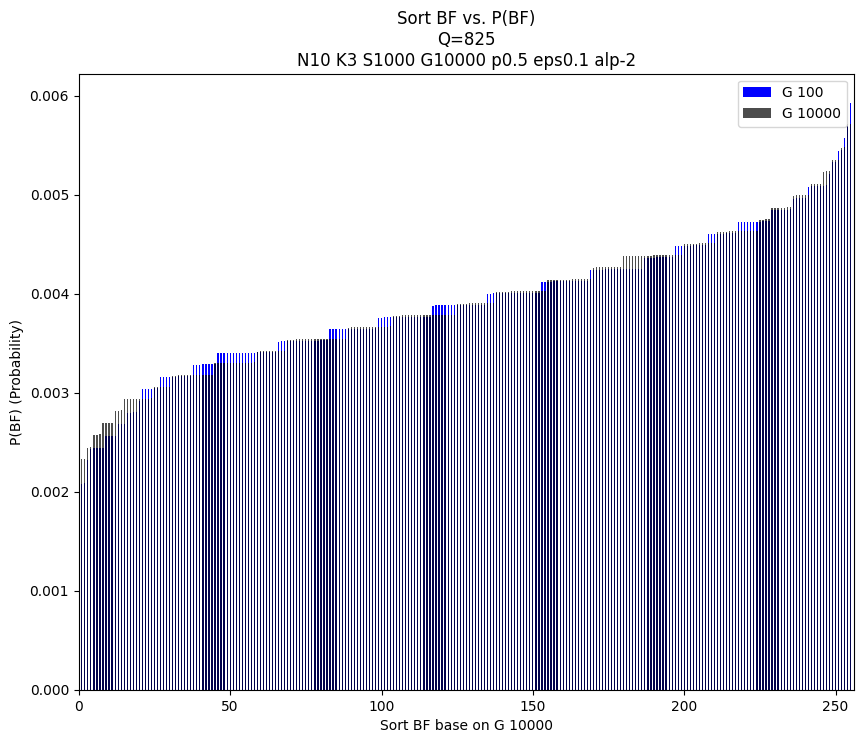

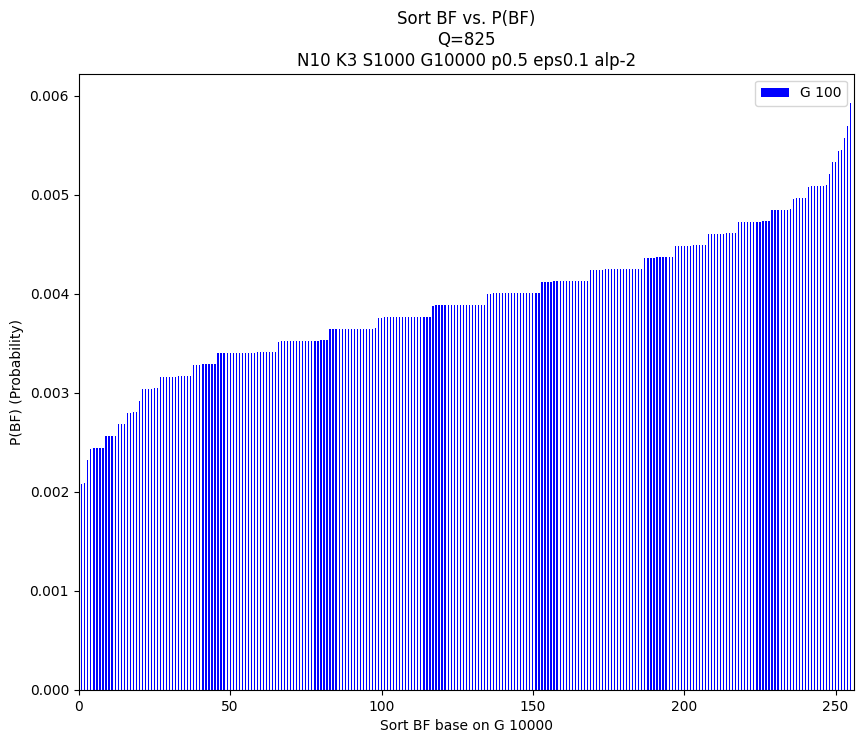

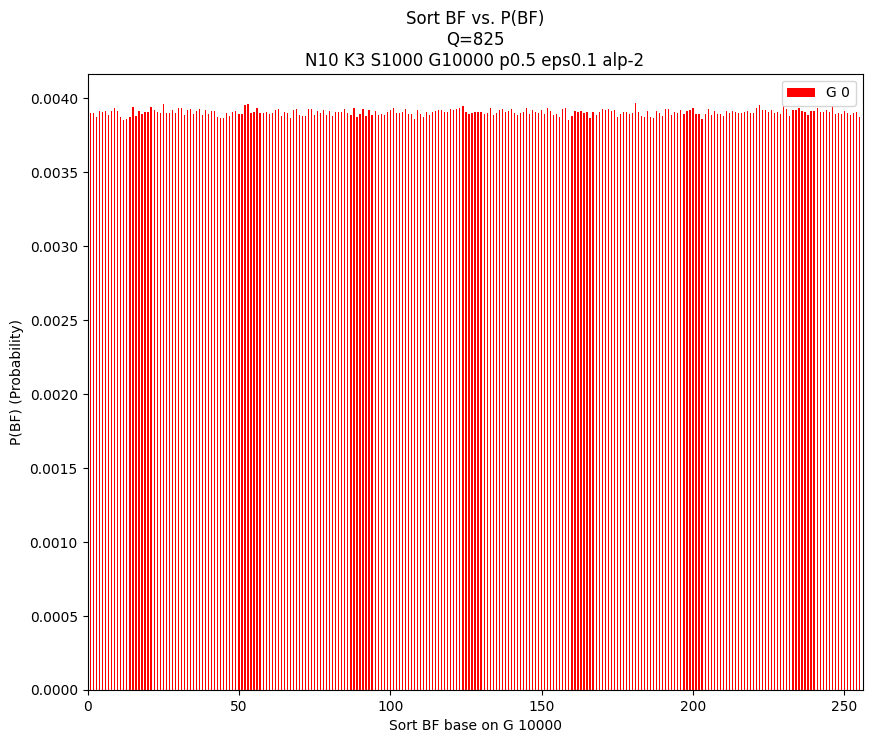

In [96]:
# Finding histogram and bins for G1000 and G10000
histBF0, binsBF0 = np.histogram(BF0, range=(0,256), bins=256, density=True)
histBF100, binsBF100 = np.histogram(BF100, range=(0,256), bins=256, density=True)
histBF1000, binsBF1000 = np.histogram(BF1000, range=(0,256), bins=256, density=True)
histBF10000, binsBF10000 = np.histogram(BF10000, range=(0,256), bins=256, density=True)

# Sort G10000 
histBF1000, binsBF1000 = zip(*sorted(zip(histBF1000, binsBF1000)))
histBF10000, binsBF10000 = zip(*sorted(zip(histBF10000, binsBF10000)))

# Base on G10000 re-index Histogram of  G0 and G100
#binsBF10000 = np.int64(np.array(binsBF10000))
#histBF0 = np.take(histBF0, binsBF10000)
#histBF100 = np.take(histBF100, binsBF10000)
#histBF1000 = np.take(histBF1000, binsBF10000)

histBF1000 = np.array(histBF1000)

plt.figure(figsize=(10,8))
#plt.bar(range(len(histBF0)), histBF0, color='red', width = 0.4, label='G 0')
plt.bar(range(len(histBF1000)), histBF1000, color='blue', width = 0.4, label='G 100')
plt.bar(range(len(histBF10000)), histBF10000, color='black', width = 0.4, alpha=0.7, label='G 10000')

plt.xlim(0,256)
plt.xlabel('Sort BF base on G 10000')
plt.ylabel('P(BF) (Probability)')
plt.title('Sort BF vs. P(BF)\nQ=%d\nN10 K3 S1000 G10000 p0.5 eps0.1 alp-2' %(len(file_names)))
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
#plt.bar(range(len(histBF0)), histBF0, color='red', width = 0.4, label='G 0')
plt.bar(range(len(histBF1000)), histBF1000, color='blue', width = 0.4, label='G 100')
#plt.bar(range(len(histBF10000)), histBF10000, color='black', width = 0.4, alpha=0.7, label='G 10000')

plt.xlim(0,256)
plt.xlabel('Sort BF base on G 10000')
plt.ylabel('P(BF) (Probability)')
plt.title('Sort BF vs. P(BF)\nQ=%d\nN10 K3 S1000 G10000 p0.5 eps0.1 alp-2' %(len(file_names)))
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.bar(range(len(histBF0)), histBF0, color='red', width = 0.4, label='G 0')
#plt.bar(range(len(histBF1000)), histBF1000, color='blue', width = 0.4, label='G 100')
#plt.bar(range(len(histBF10000)), histBF10000, color='black', width = 0.4, alpha=0.7, label='G 10000')

plt.xlim(0,256)
plt.xlabel('Sort BF base on G 10000')
plt.ylabel('P(BF) (Probability)')
plt.title('Sort BF vs. P(BF)\nQ=%d\nN10 K3 S1000 G10000 p0.5 eps0.1 alp-2' %(len(file_names)))
plt.legend()
plt.show()

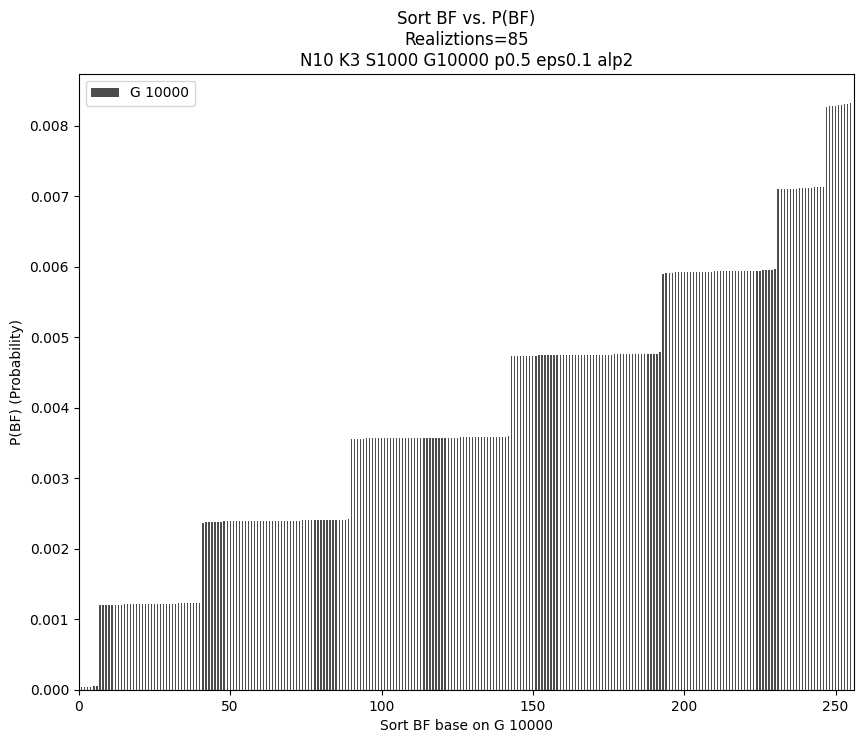

In [75]:
plt.figure(figsize=(10,8))
#plt.bar(range(len(histBF100)), histBF1000, color='blue', width = 0.4, label='G 1000')
plt.bar(range(len(histBF10000)), histBF10000, color='black', width = 0.4, alpha=0.7, label='G 10000')

plt.xlim(0,256)
plt.xlabel('Sort BF base on G 10000')
plt.ylabel('P(BF) (Probability)')
plt.title('Sort BF vs. P(BF)\nRealiztions=%d\nN10 K3 S1000 G10000 p0.5 eps0.1 alp2' %(len(file_names)))
plt.legend()
plt.savefig('pngfiles/BFvsP(BF).png', bbox_inches='tight')
plt.show()

In [32]:
#save files
freql = []
BFbinl = []
BFdecl = []
for i in range(len(binsBF10000)):
    freq = round(histBF10000[i], 5)
    freql.append(freq)

    BFdec = int(binsBF10000[i])
    BFdecl.append(BFdec)

    BFbin = (bin(int(binsBF10000[i])).zfill(10)).replace('0b','')
    BFbinl.append(BFbin)
    
    
df= pd.DataFrame({'freq':freql, 'BFbin':BFbinl, 'BFdec':BFdecl})
df.to_csv('N10K3S1000G10001p0.5eps0.1alp-2.csv')

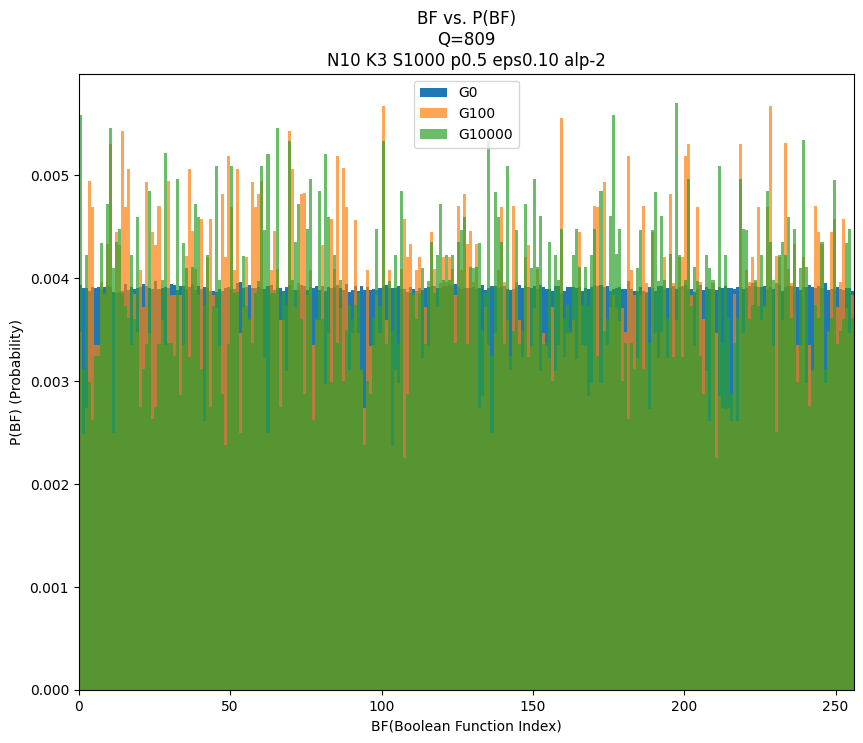

In [20]:
plt.figure(figsize=(10,8))
plt.hist(BF0, range=(0,256), bins=256, density=True, label='G0')
plt.hist(BF100, range=(0,256), bins=256, density=True, label='G100', alpha=0.7)
plt.hist(BF10000, range=(0,256), bins=256, density=True, label='G10000', alpha=0.7)

plt.xlim(0,256)
plt.xlabel('BF(Boolean Function Index)')
plt.ylabel('P(BF) (Probability)')
plt.title('BF vs. P(BF)\nQ=%d\nN10 K3 S1000 p0.5 eps0.10 alp-2' %(len(file_names)))
plt.legend()
plt.show()

In [31]:
for i in range(len(binsBF10000)):
    print(bin(binsBF10000[i]).zfill(10).replace('0b',''))

11010010
01101011
00110000
01011110
00110101
11100110
01001101
00000100
00011000
10110101
00101011
01000010
00011001
00010100
11110001
00100001
11010111
11001110
01100000
00101111
01001010
01101100
00000011
11101101
01010011
01010111
10011100
01011111
10110011
10110111
00101000
00010101
11110010
00000001
10111010
01011101
11110110
11000111
10010100
00100100
11000100
10101011
10001000
11001101
10001110
00011111
00000101
00000110
00010110
01101001
10000000
01100101
10001100
11111010
01110010
10010001
10011001
00011010
00110001
10110110
00011110
01111100
10011010
00111001
10111100
10110100
00011101
11010100
01010101
11011000
10000101
01100111
10010010
10100010
10101101
11110111
10001111
11111011
01011000
01011010
10101110
01010000
11011101
01101111
00010010
01001001
11111100
00010000
11000010
01100001
11010110
11111111
11110100
11101011
01001110
11011001
11111000
10100000
00111000
00101100
00110111
01100011
00001111
11001010
10101000
11100000
01011001
11110011
10100001
00101001
01000100
1

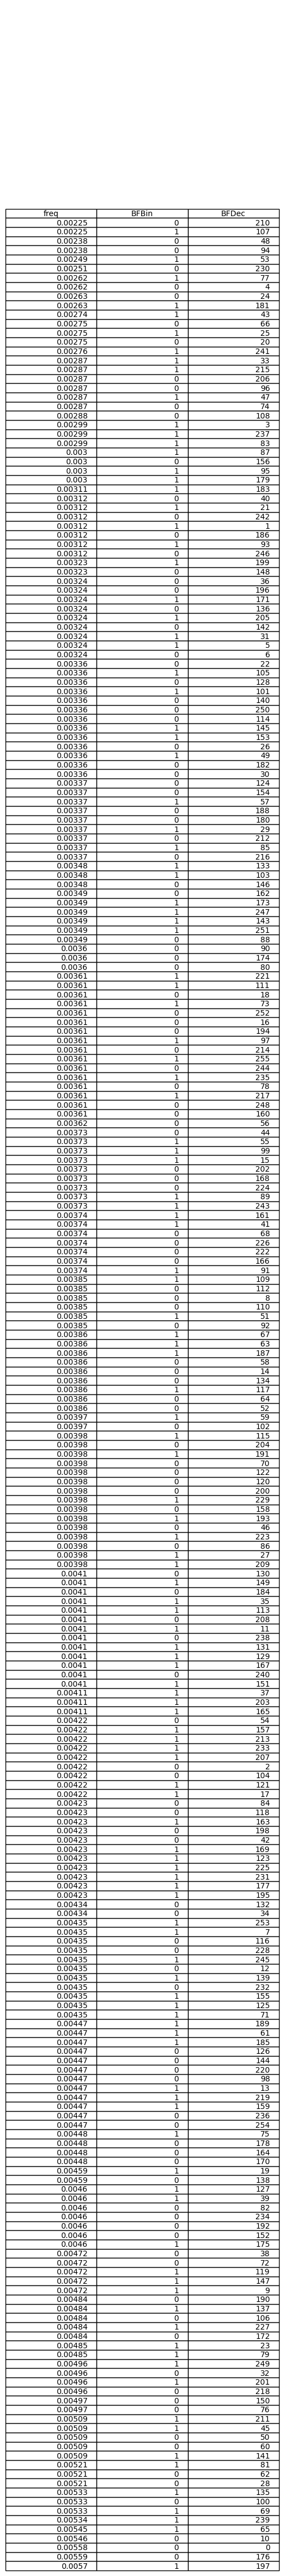

In [22]:
plt.table(cellText=df.values, colLabels=['freq', 'BFBin', 'BFDec'])
plt.axis('off')
plt.savefig('pngfiles/tableofBF.png', bbox_inches='tight')
plt.show()